In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [6]:
def build_model(my_learning_rate):
    model = tf.keras.models.Sequential() #Sequential model of layers
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,))) #gain topography, regression
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate), loss="mean_squared_error",
                  metrics=[tf.keras.metrics.RootMeanSquaredError()]) #optimizing layers
    return model           

In [8]:
#Feeding the model data
def train_model(model, feature, label, epochs, batch_size):
    history = model.fit(x=feature, y=label, batch_size=batch_size, epochs=epochs)
    #Getting weights and biases:
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]
    #Getting a compilation from the epochs.
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    rmse = hist["root_mean_squared_error"]
    return trained_weight, trained_bias, epochs, rmse

In [9]:
#Plotting the model.
def plot_the_model(trained_weight, trained_bias, feature, label):
  #Labeling the axes.
    plt.xlabel("feature")
    plt.ylabel("label")
    # Plot the feature values vs. label values.
    plt.scatter(feature, label)
    # Create a red line representing the model. The red line starts
    # at coordinates (x0, y0) and ends at coordinates (x1, y1).
    x0 = 0
    y0 = trained_bias
    x1 = feature[-1]
    y1 = trained_bias + (trained_weight * x1)
    plt.plot([x0, x1], [y0, y1], c='r')
    # Render the scatter plot and the red line.
    plt.show()

In [10]:
def plot_the_loss_curve(epochs, rmse):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")
    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()

In [11]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

C:\Users\Sarousi\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/10
1/1 [==============================] - 0s 187ms/step - loss: 1269.2103 - root_mean_squared_error: 35.6260
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - loss: 1250.6893 - root_mean_squared_error: 35.3651
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 1237.3846 - root_mean_squared_error: 35.1765
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 1226.3224 - root_mean_squared_error: 35.0189
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 1216.5594 - root_mean_squared_error: 34.8792
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 1207.6586 - root_mean_squared_error: 34.7514
Epoch 7/10
1/1 [==============================] - 0s 2ms/step - loss: 1199.3761 - root_mean_squared_error: 34.6320
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 1191.5609 - root_mean_squared_error: 34.5190
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 1184.111

C:\Users\Sarousi\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


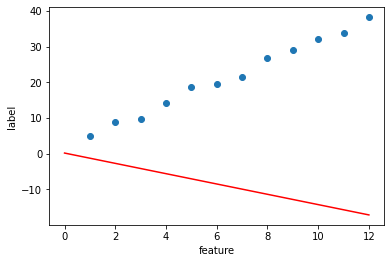

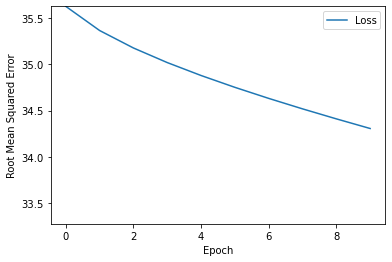

In [15]:
#Specifying hyperparameters

learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(
    my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

C:\Users\Sarousi\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/10
1/1 [==============================] - 0s 187ms/step - loss: 980.7087 - root_mean_squared_error: 31.3163
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 964.4363 - root_mean_squared_error: 31.0554
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 952.7630 - root_mean_squared_error: 30.8669
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 943.0666 - root_mean_squared_error: 30.7094
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 934.5161 - root_mean_squared_error: 30.5699
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 926.7263 - root_mean_squared_error: 30.4422
Epoch 7/10
1/1 [==============================] - 0s 2ms/step - loss: 919.4824 - root_mean_squared_error: 30.3230
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 912.6512 - root_mean_squared_error: 30.2101
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 906.1437 - root_

C:\Users\Sarousi\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


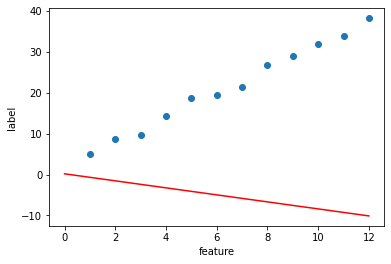

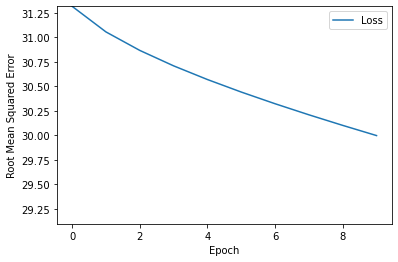

In [17]:
learning_rate=0.01
epochs= 10   # Replace ? with an integer.
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)